<a href="https://colab.research.google.com/github/Ckiteme/CKiteme-Assignment---Regression-Analysis-with-Python/blob/main/CKiteme_Assignment_Regression_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

Perform multiple linear regression to predict the price of a house. Make sure to check for assumptions.

### b) Defining the Metric for Success

The project will be a success when we are able to create a multiple linear regression model that fits at least 80% of the training data.

### c) Understanding the Context 

Knightly Frankly is an estate agency, residential and commercial property consultancy
founded in London by John Knight, Howard Frank and William Rutley in 1896.
Together with its New York-based affiliate Newmark, Knightly Frankly is one of the
world's largest global property consultancies.
As a data scientist working for the agency, you have been put to task to help develop a
solution that would allow the agency to price its properties.

### d) Recording the Experimental Design

1. Load datasets and libraries
2. Clean data
3. Perform univariate and bivariate analysis
4. Check that the assumptions of multiple linear regression aren't violated
5. Perform multiple linear regression
6. Summarize findings
7. Provide recommendations
8. Challenge the solution

### e) Data Relevance

The dataset provided is appropriate and relevant to the research question.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)

In [3]:
house = pd.read_csv('house_data.csv')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# check dataset shape
house.shape

(21613, 21)

In [5]:
# chekc data types
house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We will drop the 'id' and 'date' variables and then drop any duplicated values so that it will be easier to work with the dataset.

In [6]:
house = house.drop(columns = ['id', 'date'])

In [8]:
# dropping duplicates, if any
house.drop_duplicates(inplace = True)
house.shape

(21608, 19)

In [7]:
# check for missing data
house.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values.

## <font color='#2F4F4F'>3. Data Analysis</font>

For our analysis, we will check the assumptions of multiple linear regression which include:
1. There must be a linear relationship between the independent variables and the target variable.
2. Few or no outliers.
3. Little to no multicollinearity.
4. Homoscedasticity - variance of error terms must be similar across the independent variables.
5. All residuals must be normally distributed. 

### 3.1 Checking linearity

In [8]:
# create list to store column names to test against 'price'
house_columns = house.columns.to_list()
house_columns.remove('price')
len(house_columns)

18

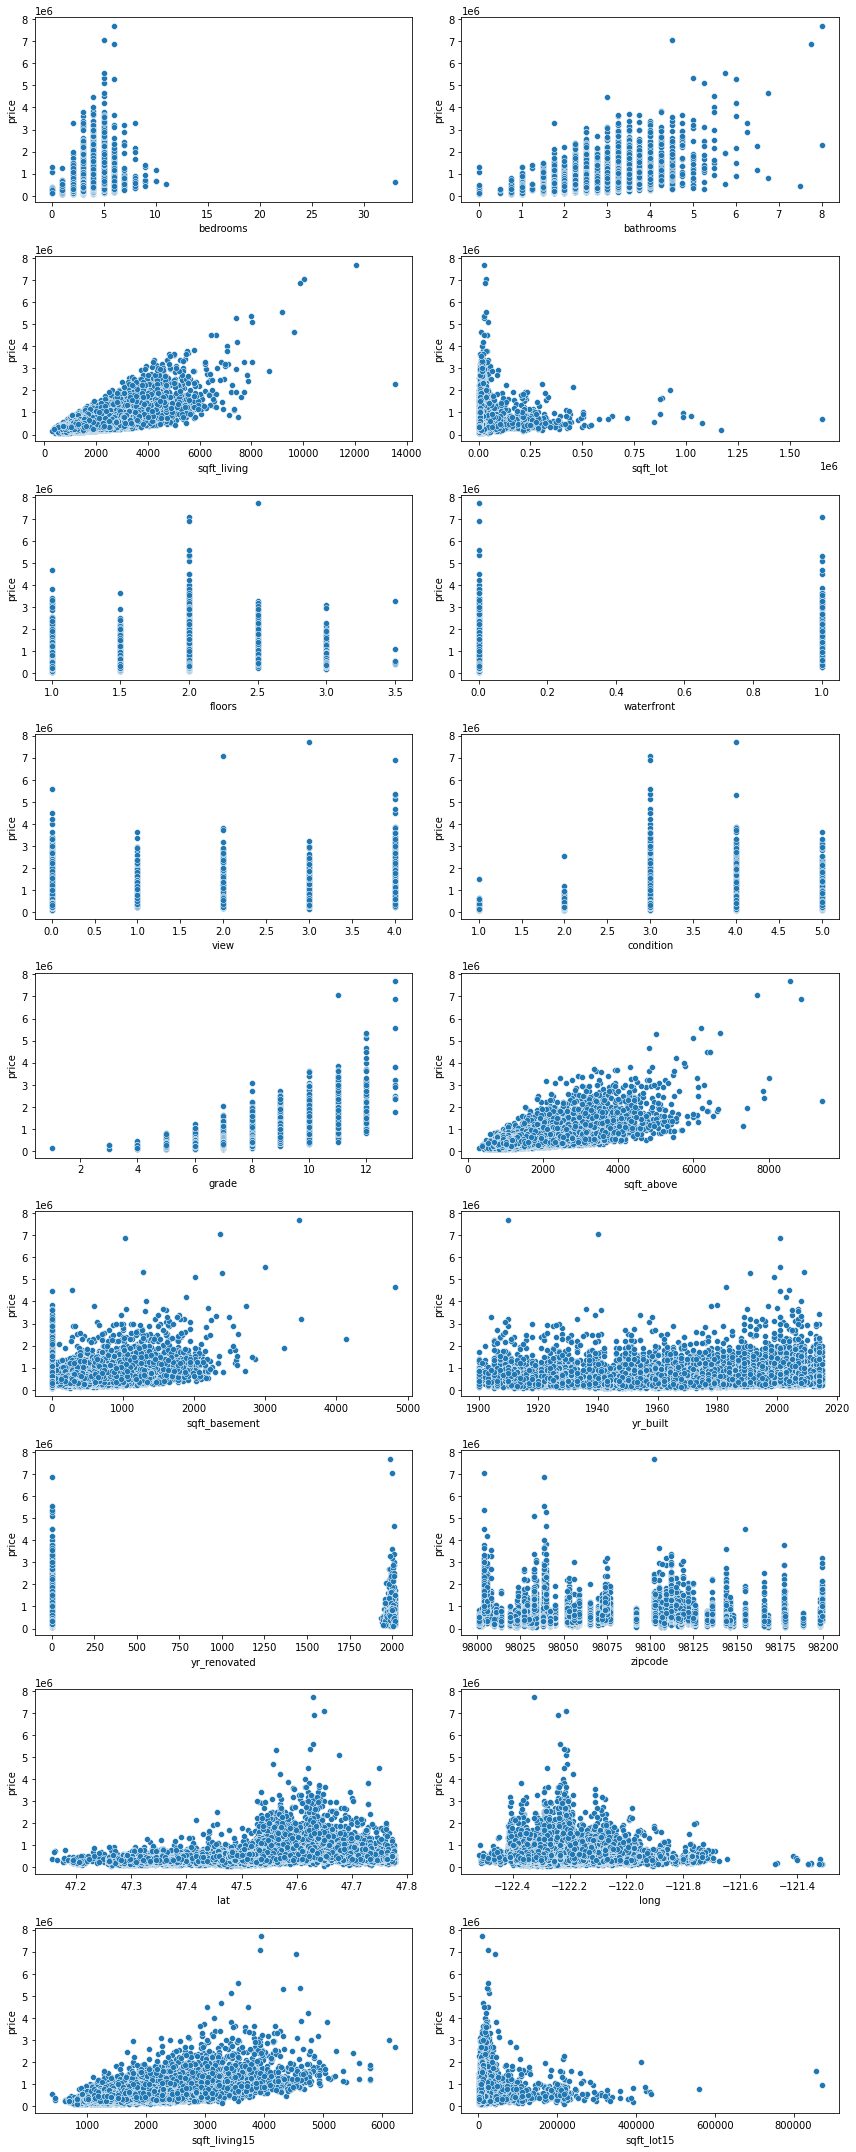

In [9]:
# creating scatterplots to observe the relationship between price and the variables
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(nrows = 9, ncols = 2, figsize = (12, 30))

for ax, col in zip(axes.flatten(), house_columns):
    sns.scatterplot(house[col], house['price'], ax = ax)
    plt.xlabel("{}".format(col))
    plt.ylabel("price")
    
plt.tight_layout()

What have you noticed? What will you do next?

There is a strong linear relationship between price and grade,sqft_living15, sqft_above and sqft_living.

The rest of the features have weak or no linear relationship to price. 
This may affect our prediction if we use multiple regression since it assumes linear relationship between the independent variables and the dependent.

For the yr_renovated, with such disparate values between no renovations as 0 values and the years having values around 2000, best to consider this as a discrete variable rather than continuous

### 3.2 Checking for outliers

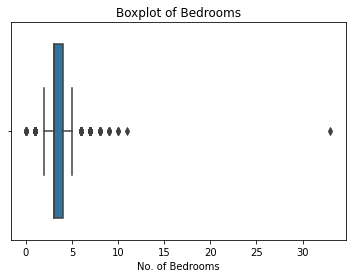

In [12]:
# create a boxplot to visualize the outliers
# Bedrooms

sns.boxplot(x = house['bedrooms']) 

# Tweak and label

plt.title('Boxplot of Bedrooms')
plt.xlabel('No. of Bedrooms')

# Display

plt.show()

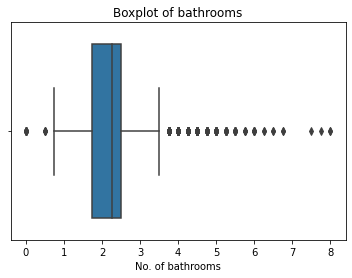

In [13]:
# create a boxplot to visualize the outliers
# bathrooms

sns.boxplot(x = house['bathrooms']) 

# Tweak and label

plt.title('Boxplot of bathrooms')
plt.xlabel('No. of bathrooms')

# Display

plt.show()

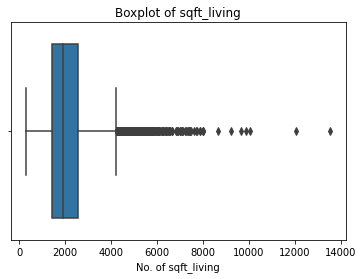

In [14]:
# create a boxplot to visualize the outliers
# sqft_living

sns.boxplot(x = house['sqft_living']) 

# Tweak and label

plt.title('Boxplot of sqft_living')
plt.xlabel('No. of sqft_living')

# Display

plt.show()

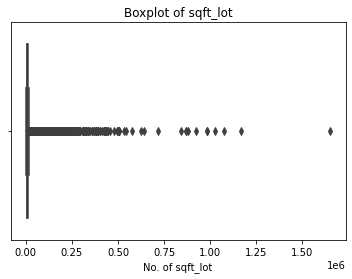

In [15]:
# create a boxplot to visualize the outliers
# sqft_lot

sns.boxplot(x = house['sqft_lot']) 

# Tweak and label

plt.title('Boxplot of sqft_lot')
plt.xlabel('No. of sqft_lot')

# Display

plt.show()

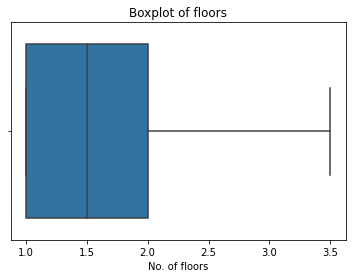

In [16]:
# create a boxplot to visualize the outliers
# floors

sns.boxplot(x = house['floors']) 

# Tweak and label

plt.title('Boxplot of floors')
plt.xlabel('No. of floors')

# Display

plt.show()

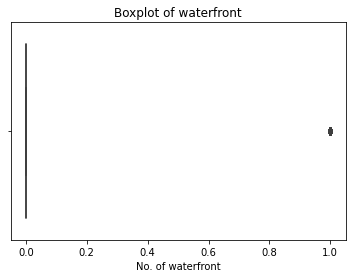

In [18]:
# create a boxplot to visualize the outliers
# waterfront

sns.boxplot(x = house['waterfront']) 

# Tweak and label

plt.title('Boxplot of waterfront')
plt.xlabel('No. of waterfront')

# Display

plt.show()

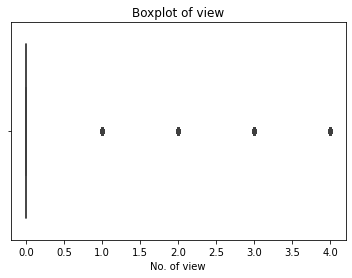

In [19]:
# create a boxplot to visualize the outliers
# view

sns.boxplot(x = house['view']) 

# Tweak and label

plt.title('Boxplot of view')
plt.xlabel('No. of view')

# Display

plt.show()

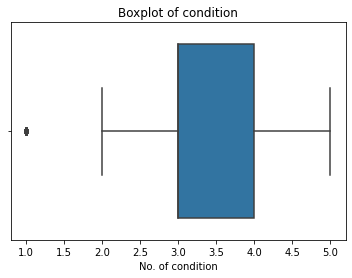

In [20]:
# create a boxplot to visualize the outliers
# condition

sns.boxplot(x = house['condition']) 

# Tweak and label

plt.title('Boxplot of condition')
plt.xlabel('No. of condition')

# Display

plt.show()

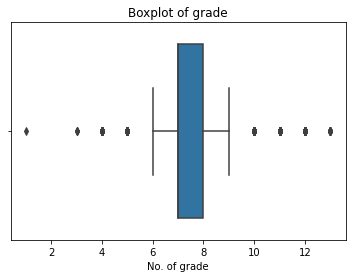

In [21]:
# create a boxplot to visualize the outliers
# grade

sns.boxplot(x = house['grade']) 

# Tweak and label

plt.title('Boxplot of grade')
plt.xlabel('No. of grade')

# Display

plt.show()

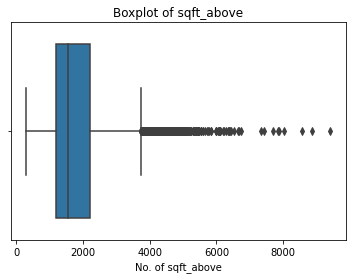

In [22]:
# create a boxplot to visualize the outliers
# sqft_above 

sns.boxplot(x = house['sqft_above']) 

# Tweak and label

plt.title('Boxplot of sqft_above')
plt.xlabel('No. of sqft_above')

# Display

plt.show()

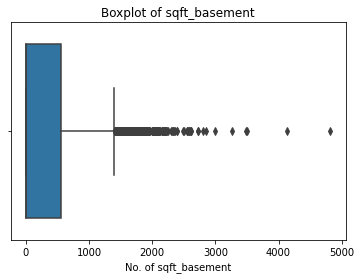

In [23]:
# create a boxplot to visualize the outliers
# sqft_basement

sns.boxplot(x = house['sqft_basement']) 

# Tweak and label

plt.title('Boxplot of sqft_basement')
plt.xlabel('No. of sqft_basement')

# Display

plt.show()

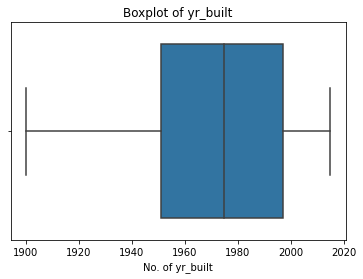

In [24]:
# create a boxplot to visualize the outliers
# yr_built

sns.boxplot(x = house['yr_built']) 

# Tweak and label

plt.title('Boxplot of yr_built')
plt.xlabel('No. of yr_built')

# Display

plt.show()

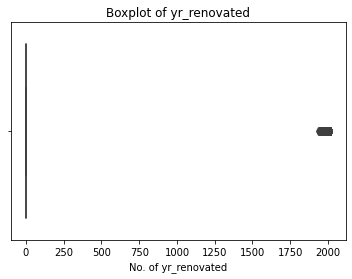

In [25]:
# create a boxplot to visualize the outliers
# yr_renovated

sns.boxplot(x = house['yr_renovated']) 

# Tweak and label

plt.title('Boxplot of yr_renovated')
plt.xlabel('No. of yr_renovated')

# Display

plt.show()

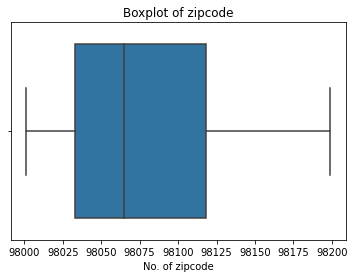

In [26]:
# create a boxplot to visualize the outliers
# zipcode 

sns.boxplot(x = house['zipcode']) 

# Tweak and label

plt.title('Boxplot of zipcode')
plt.xlabel('No. of zipcode')

# Display

plt.show()

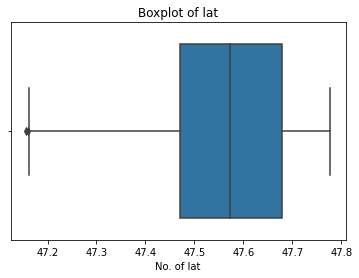

In [27]:
# create a boxplot to visualize the outliers
# lat 

sns.boxplot(x = house['lat']) 

# Tweak and label

plt.title('Boxplot of lat')
plt.xlabel('No. of lat')

# Display

plt.show()

What observations can you make? What actions are you going to take next?

There are many outliers. 
This means that our data is not fit to use multiple linear regression since this model is sensitive to outliers.

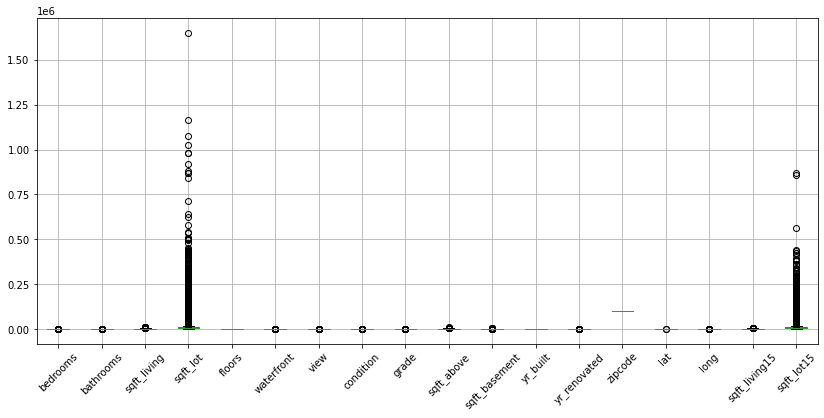

In [10]:
# create a boxplot to visualize the outliers (one code for all variables)
num_cols = house.columns.to_list()
num_cols.remove('price')

plt.figure(figsize = (14, 6))
house.boxplot(num_cols)
plt.xticks(rotation = 45)
plt.show()


### 3.3 Checking multicollinearity

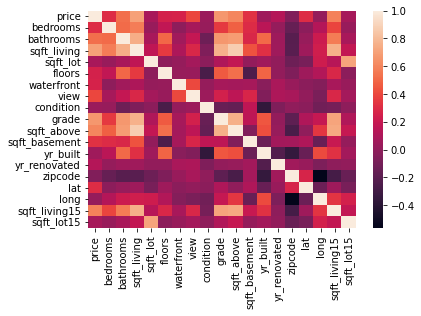

In [20]:
# create a heatmap of the correlations
#Option1
housecorr = house.corr()
housecorr
sns.heatmap(housecorr)

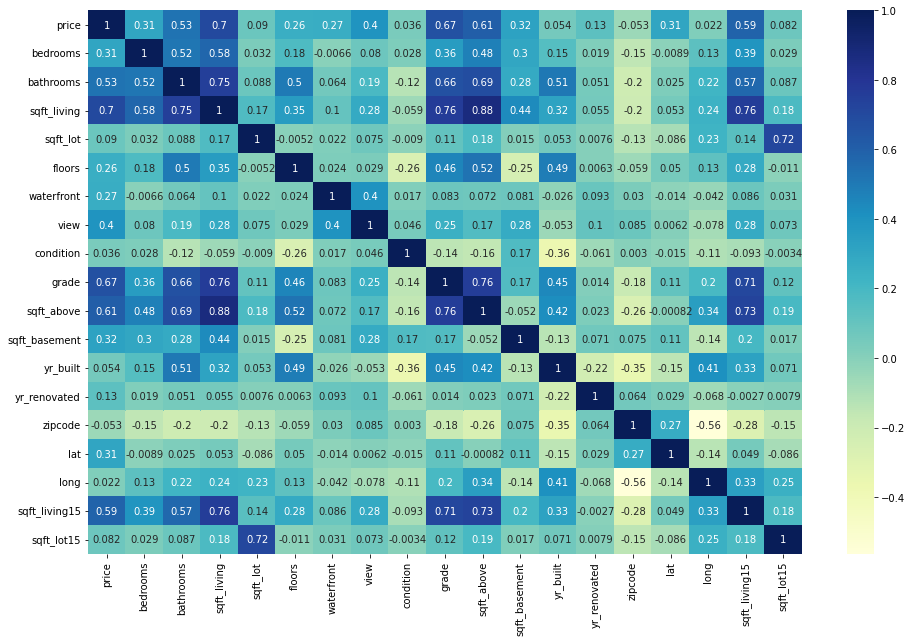

In [11]:
#Option2
plt.figure(figsize = (16, 10))
sns.heatmap(house.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [13]:
# Compute the correlation coefficients between all of the features with the price.
correlation = house.corr()

price_correlation = correlation['price']

# Sort the correlation coefficients in descending order.
ab = price_correlation
sorted_corr = ab.sort_values(ascending = False)
sorted_corr

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

In [14]:
# check VIF scores
pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,3.330527,0.301776,-0.287467,-1.400302e+00,-0.048322,-0.032770,-0.457549,-0.367555,-0.155766,-1.022537,-8.667776e-02,7.248685e-02,0.698215,-0.072197,0.282701,-0.757673,0.274333,-0.134810,0.094780
bedrooms,0.301776,1.679407,-0.487218,-1.433504e-01,0.044983,0.046725,0.021777,0.080807,-0.064881,0.214397,-8.618337e-01,-4.706871e-01,0.197763,0.038912,0.105727,-0.017863,0.042252,0.012998,0.093987
bathrooms,-0.287467,-0.487218,3.375605,1.333690e-02,-0.019957,-0.672247,0.049253,-0.009921,-0.123576,-0.179747,-1.173647e+00,-1.036944e+00,-0.996044,-0.253551,0.017395,0.024441,0.030376,0.103768,0.063291
sqft_living,-1.384590,-0.147629,0.014341,-1.444692e+14,-0.225871,1.951644,0.166943,0.215016,0.133252,1.032533,1.302573e+14,6.961631e+13,-0.568765,-0.093639,-0.572856,0.235519,0.089463,-0.163705,0.410499
sqft_lot,-0.048322,0.044983,-0.019957,-2.322546e-01,2.103223,0.045738,0.033949,-0.053665,0.032821,-0.039016,2.904909e-02,7.788871e-02,0.088632,0.022491,-0.006712,0.064359,-0.137142,0.165900,-1.460694
floors,-0.032770,0.046725,-0.672247,1.966904e+00,0.045738,2.012230,-0.000779,-0.037010,0.091205,-0.220790,-2.265870e+00,-3.259990e-01,-0.488350,-0.079893,-0.173548,-0.120182,0.161368,0.273943,0.071726
waterfront,-0.457549,0.021777,0.049253,1.683874e-01,0.033949,-0.000779,1.266624,-0.442050,0.008729,0.189717,-7.733542e-02,-2.100727e-03,-0.116972,-0.055484,-0.016286,0.113986,-0.010250,0.072972,-0.031491
view,-0.367555,0.080807,-0.009921,2.144900e-01,-0.053665,-0.037010,-0.442050,1.475723,-0.004284,-0.072390,-2.554396e-03,-2.930291e-01,0.074565,-0.032269,-0.171878,0.202103,0.041233,-0.310737,-0.017953
condition,-0.155766,-0.064881,-0.123576,1.325616e-01,0.032821,0.091205,0.008729,-0.004284,1.256760,-0.006630,7.761216e-04,-1.329411e-01,0.528894,0.210049,0.148047,0.099110,-0.019859,0.082166,-0.032687
grade,-1.022537,0.214397,-0.179747,1.043852e+00,-0.039016,-0.220790,0.189717,-0.072390,-0.006630,3.730985,-2.138405e+00,-8.052570e-01,-0.853346,-0.049257,-0.003474,-0.098248,0.309608,-0.870213,0.042774


What have you noticed? What actions are you going to take next regarding this?

Observation: There's little multicollenearity between the variables. Therefore no variable will be dropped for now.

## <font color='#2F4F4F'>4. Data Modeling</font>

In [15]:
# split into features (X) and label (Y)
X = house.drop(['price'], axis = 1)
y = house['price']

In [16]:
# split into 80-20 train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
# fit regressor to data and make predictions
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [18]:
# evaluate RMSE and r-squared scores
from sklearn import metrics 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared:', metrics.r2_score(y_test, y_pred))

Root Mean Squared Error: 190473.37551184217
R Squared: 0.6949310095118018


What conclusions have you drawn?

The R2 score of 0.688 is quite low. The biggest contributor to this low score is the high number of outliers. A different model that is not as affected by outliers would have given a better score.

### 4.1 Test for normality and homoscedasticity

Text(0, 0.5, 'Residuals')

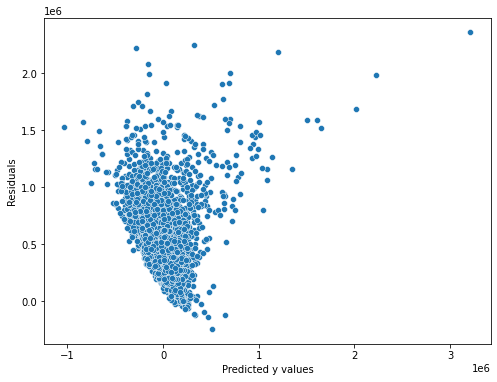

In [19]:
# create a dataframe of residuals
residuals = y_test - y_pred

residuals_df = pd.DataFrame(residuals)
residuals_df.head()

# plotting our residuals
plt.figure(figsize=(8,6))
sns.scatterplot(x=residuals, y=y_pred)
plt.xlabel("Predicted y values")
plt.ylabel("Residuals")



What is your interpretation of the residual plot?

Normality of residual is not normal.

This model violates the normality assumptions for linear regression. Log-transformation can often help when these assumptions are not met. Let's update the values to their natural logs and re-check the assumptions.

In [21]:
# fit regressor to data and make predictions

from sklearn.tree import DecisionTreeRegressor 

# Creating our regressor, We'll just use the decision tree regressor this time
regressor =DecisionTreeRegressor()

# Fitting our data to our regressors 
regressor.fit(X_train, y_train)

#predict
y_pred = regressor.predict(X_test)

In [ ]:
import scipy as sp

# using the scipy bartlett function to get our test result and p-value


# computing the critical value of a chi-squared distribution
degree_of_freedom = len(y_pred) - 1
prob = 1 - p_value
critical_value = sp.stats.chi2.ppf(prob, degree_of_freedom)

print("Critical value:", critical_value)

If the test result of our Bartlett test is greater than the critical value of the chi-squared distribution, then we will reject our null value and conclude that the variances in our dataset are not equal, i.e., they are heterogeneous. Otherwise, we will accept that this dataset's variances are homogeneous.

In [ ]:
if (test_result > critical_value):
    print(" The variances are heterogeneous (unequal), and the model needs to be reassessed.")
else:
    print('The variances are homogeneous (equal).')

### 4.2 Boosting

We can try boosting to see if it will improve our model. We will experiment with 3 types of boosting:
- Ada Boosting
- Gradient Boosting
- eXtreme Gradient (XG) Boosting

In [22]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# creating a list of learning rates to use as hyperparameters
learning_rates = [0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# setting up our Ada booster
for lr in learning_rates:
    ada = AdaBoostRegressor(learning_rate = lr, random_state = 0)
    ada.fit(X_train, y_train)
    ada_predict = ada.predict(X_test)
    print("Ada Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(metrics.mean_squared_error(y_test, ada_predict)))
    print()
    
print("***************************************************") 

# setting up our Gradient booster
for lr in learning_rates:
    gradient = GradientBoostingRegressor(learning_rate = lr, random_state = 0)
    gradient.fit(X_train, y_train)
    gradient_predict = gradient.predict(X_test)
    print("Gradient Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(metrics.mean_squared_error(y_test, gradient_predict)))
    print()

print("***************************************************")

# setting up our XG booster
for lr in learning_rates:
    xgbr = XGBRegressor(learning_rate = lr, random_state = 0)
    xgbr.fit(X_train, y_train)
    xgbr_predict = xgbr.predict(X_test)
    print("XG Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(metrics.mean_squared_error(y_test, xgbr_predict)))
    print()

Ada Boosting Regression with Learning Rate: 0.1
RMSE Score: 191169.38138329153

Ada Boosting Regression with Learning Rate: 0.2
RMSE Score: 208574.77592562386

Ada Boosting Regression with Learning Rate: 0.3
RMSE Score: 223601.46457561635

Ada Boosting Regression with Learning Rate: 0.4
RMSE Score: 226907.11906317674

Ada Boosting Regression with Learning Rate: 0.5
RMSE Score: 252418.75052035716

Ada Boosting Regression with Learning Rate: 0.6
RMSE Score: 259068.5522781201

Ada Boosting Regression with Learning Rate: 0.7
RMSE Score: 278487.4505172918

Ada Boosting Regression with Learning Rate: 0.8
RMSE Score: 297774.66194228665

Ada Boosting Regression with Learning Rate: 0.9
RMSE Score: 323141.8403423051

***************************************************
Gradient Boosting Regression with Learning Rate: 0.1
RMSE Score: 126035.6522228686

Gradient Boosting Regression with Learning Rate: 0.2
RMSE Score: 120148.4907040183

Gradient Boosting Regression with Learning Rate: 0.3
RMSE Score

In [52]:
print("Ada Boosting R-squared Score:", metrics.r2_score(y_test, ada_predict))
print("Gradient Boosting R-squared Score:", metrics.r2_score(y_test, gradient_predict))
print("XG Boosting R-squared Score:", metrics.r2_score(y_test, xgbr_predict))

Ada Boosting R-squared Score: 0.3169191609927319
Gradient Boosting R-squared Score: 0.8482131834922497
XG Boosting R-squared Score: 0.8486817105103923


In [23]:
# Finally, we evaluate the models
# ---  
# NB: The closer the RMSE is to 0, the better the model.
#  
# Lets now train our regressors
# ---
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import BaggingRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [24]:
# Creating our regressors, We'll just use the decision tree regressor this time
# ---
# 
regressor = DecisionTreeRegressor()

# Then creating our ensemble regressors
# ---

In [25]:
#Bagging Regressors
# ---
bagging_est_regressor = BaggingRegressor()
random_forest_regressor = RandomForestRegressor()

# Boosting Regressors
# ---
ada_boost_regressor = AdaBoostRegressor()
gbm_regressor = GradientBoostingRegressor()
xgboost_regressor = xgb.XGBRegressor(objective ='reg:squarederror') # It requires us to specify the objective function

# Fitting our data to our regressors 
# ---
# Decision Tree Regressor
regressor.fit(X_train, y_train)

# Bagging Regressors
# ---
bagging_est_regressor.fit(X_train, y_train)
random_forest_regressor.fit(X_train, y_train)

# Boosting Regressors
# ---
ada_boost_regressor.fit(X_train, y_train)
gbm_regressor.fit(X_train, y_train)
xgboost_regressor.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror')

In [26]:
# Making predictions using our models
# ---
#  
y_pred = regressor.predict(X_test)

# Bagging Regressors
# ---
bag_est_y_pred = bagging_est_regressor.predict(X_test)
random_forest_y_pred = random_forest_regressor.predict(X_test)

# Boosting Regressors
# ---
ada_boost_y_pred = ada_boost_regressor.predict(X_test)
gbm_y_pred = gbm_regressor.predict(X_test)
xgboost_y_pred = xgboost_regressor.predict(X_test)

In [27]:
# Finally, we evaluate the models
# ---  
# NB: The closer the RMSE is to 0, the better the model.
#  
from sklearn.metrics import mean_squared_error

print('Decision Tree - Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Bagging Regressors
# ---
print('Bagging Estimator - Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, bag_est_y_pred)))
print('Random Forest - Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, random_forest_y_pred)))

#*******************************************************************************************************************
# Boosting Regressors
# ---
print('Ada Boost - Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, ada_boost_y_pred)))
print('GBM - Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, gbm_y_pred)))
print('XGBoost - Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, xgboost_y_pred)))

Decision Tree - Root Mean Squared Error: 164731.0056735432
Bagging Estimator - Root Mean Squared Error: 119410.68794042998
Random Forest - Root Mean Squared Error: 113328.39251016159
Ada Boost - Root Mean Squared Error: 337300.9116022271
GBM - Root Mean Squared Error: 126044.85185648
XGBoost - Root Mean Squared Error: 125445.55581169245


From the above analysis, we see that XG Boosting with a learning rate of 0.1 returned the lowest RMSE score (125,445). Although still higher than 10% of the target variable mean, it is a better score than that of the original linear regression. Also, the r-squared score of XG Boosting is 0.8 which means it fits about 80% of our data, which is much better than for linear regression.

## <font color='#2F4F4F'>5. Summary of Findings</font>

Our dataset met most of the assumptions for multiple linear regression such as normality and homoscedasticity. However, the assumptions on linearity, multicollinearity, and outliers were not fully met, thereby proving to be a poor data for multiple linear regression.

With XG Boosting, the model fit to about 80% of the data, thereby meeting our metric for success.

## <font color='#2F4F4F'>6. Recommendations</font>

I would recommend that Knightly Frankly use XG Boost Regressor rather than Multiple Linear Regression to predict the prices of the houses.

## <font color='#2F4F4F'>7. Challenging your Solution</font>

#### a) Did we have the right question?
Yes.

#### b) Did we have the right data?
Yes.

#### c) What can be done to improve the solution?
Apart from carrying out hyperparameter tuning, we can implement cross validation. Alternatively, we can try out other regression analysis models.